In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('Players.csv', usecols=[1,2,3,4,5,6,7], skip_blank_lines=True).dropna()
data[['born', 'height', 'weight']] = data[['born', 'height', 'weight']].astype("int16")

data.head()

,Player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky
6,Charlie Black,196,90,University of Kansas,1921,Arco,Idaho
7,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania
8,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey


In [95]:
us_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
             "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
             "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
             "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

# data[['birth_state']] = data[['birth_state']].apply(lambda x: x in us_states)
data['abroad_us'] = 1 - data['birth_state'].isin(us_states).astype(int)
data.head()

,Player,height,weight,collage,born,birth_city,birth_state,abroad_us
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana,0
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky,0
6,Charlie Black,196,90,University of Kansas,1921,Arco,Idaho,0
7,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania,0
8,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey,0


**Створення фічи чи народився гравець у штатах, чи ні**

In [96]:
mean_height = data['height'].mean()
data['high'] = np.where(data['height'] > mean_height, 1, 0)

mean_weight = data['height'].mean()
data['heavy'] = np.where(data['weight'] > mean_weight, 1, 0)
data.head()


,Player,height,weight,collage,born,birth_city,birth_state,abroad_us,high,heavy
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana,0,0,0
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky,0,0,0
6,Charlie Black,196,90,University of Kansas,1921,Arco,Idaho,0,0,0
7,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania,0,0,0
8,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey,0,0,0


**Фіча високий та важкий порівняно з середнім значенням**

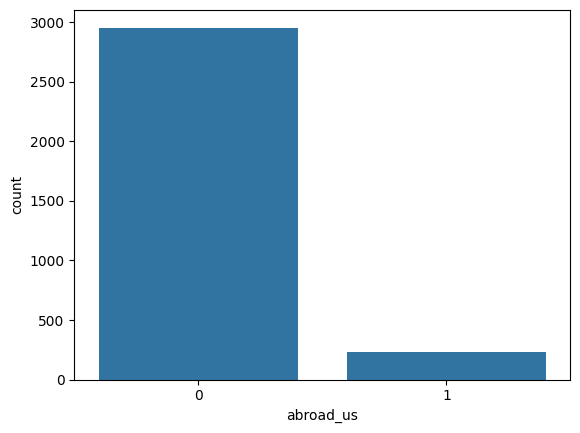

In [92]:
sns.countplot(x="abroad_us",  data=data);



**Розподіл гравців США/Інші країни.**

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>]], dtype=object)

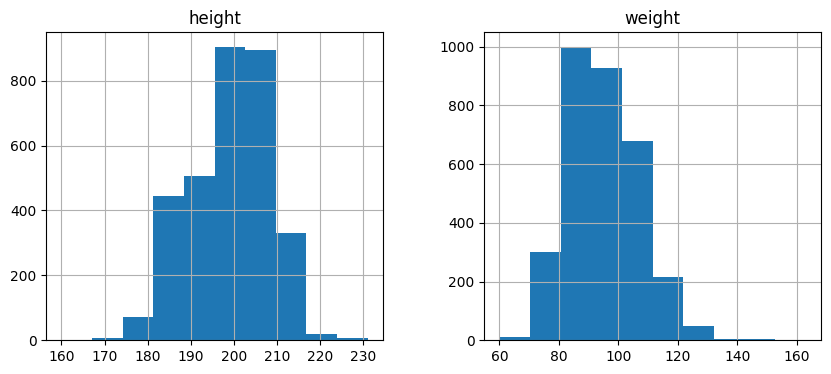

In [77]:
data[['height', 'weight']].hist(figsize=(10, 4))

**Видно стандартний розподіл Гаусса по вазі та зросту. Дані гарно підходять для тренування моделі**

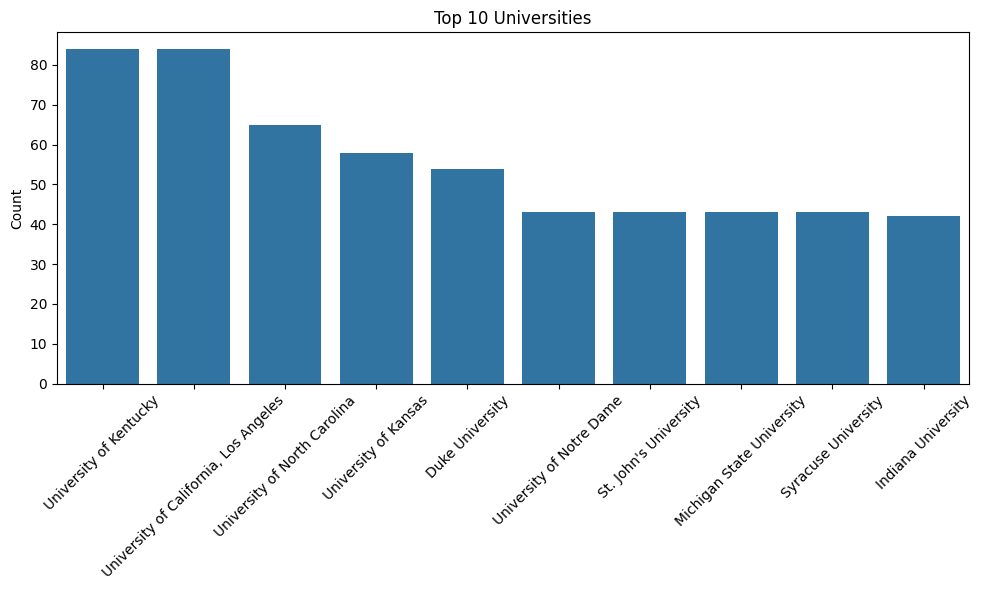

In [78]:
data_sorted = data.groupby(['collage'])['Player'].count().reset_index(name='Count').sort_values(['Count'], ascending=False) 
top_10_colleges = data_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='collage', y='Count', data=top_10_colleges)
plt.ylabel('Count')
plt.xlabel('')
plt.title('Top 10 Universities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**10 Найпопулярніших університетів серед баскетболістів, числовий розподіл**

In [79]:
data_1 = data.groupby(['birth_state'])['Player'].count().reset_index(name='Count').sort_values(['Count'], ascending=False) 
data_1.head(10)

,birth_state,Count
10,California,337
69,New York,286
36,Illinois,203
79,Pennsylvania,162
75,Ohio,136
56,Michigan,131
98,Texas,127
29,Georgia,113
48,Louisiana,101
72,North Carolina,96


<Axes: xlabel='height'>

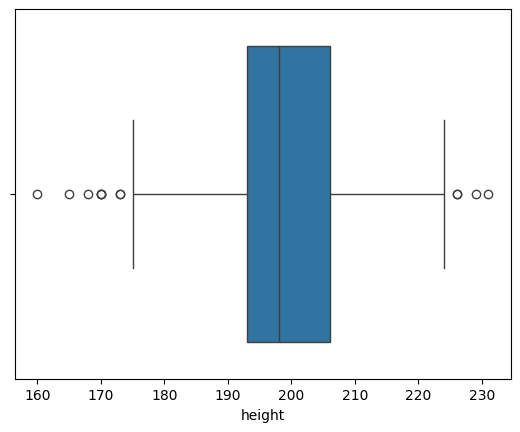

In [80]:
sns.boxplot(data=data, x='height')

<Axes: xlabel='weight'>

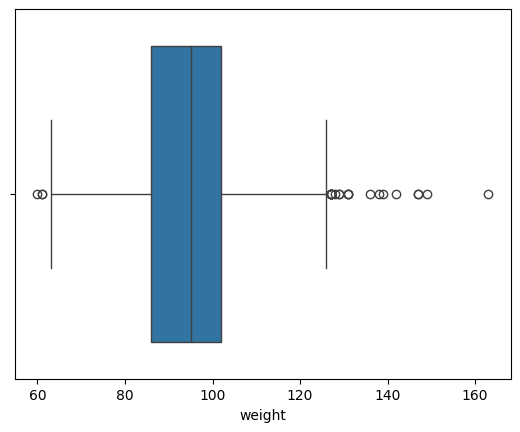

In [81]:
sns.boxplot(data=data, x='weight')

**Видно за боксплотами що в обох фічах є аутлаєри, бажано прибрати**

<Axes: xlabel='born', ylabel='height'>

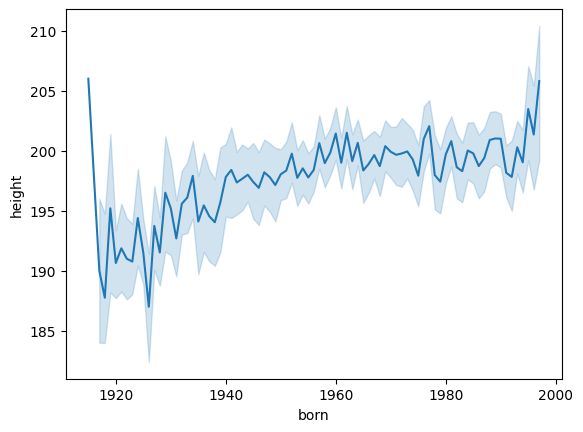

In [88]:
sns.lineplot(x="born", y="height",
             data=data)

<Axes: xlabel='born', ylabel='weight'>

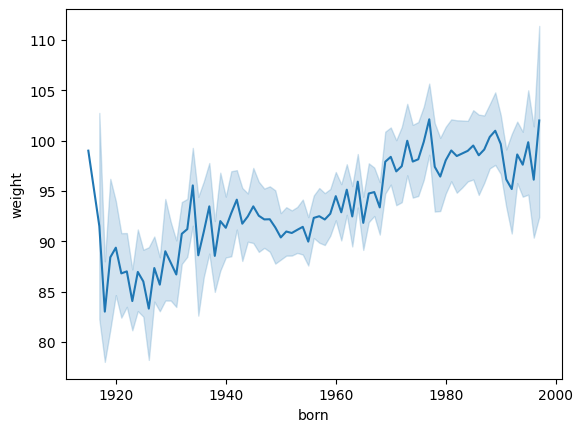

In [89]:
sns.lineplot(x="born", y="weight",
             data=data)

**З пплином часу конституція тіла гравців змінювалася, маса та зріст збільшувалися**